In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Iterations = (10**5)
N = 7
T = N
#epsilon = T/(N)
m = 1
hbar = 1

xf = 3
xi = -3

dx = 0.05
dt = T/N
_dt = N/T

xs = np.arange(xi,dx-xi,dx)
#A = (m/(2*np.pi*dt))**(0.5*N)
#print("xs =", xs)

In [83]:

def wavefunc(x):
    return (np.exp(0.5*-x**2)/np.pi**0.25)**2

def potential(x):
    return 0.5*(x**2)

def kinetic(v):
    return 0.5*m*(v**2)

def S(path):
    E = 0
    for i in range(1,N):
        E += S_j(path,i)
    return E

def S_j(path,i):
    return dt*(kinetic((path[i]-path[i-1])*_dt) + potential(0.5*(path[i]+path[i-1])))

def metropolis(numberOfPaths,x): #iterates num times to generate optimized paths that start and end at a given x

    thermalInterval = 10

    array = np.zeros(shape=(numberOfPaths,N))
    initialPath = np.ones(N)*5
    #np.random.uniform(-3,3,N) # generate random path
    initialPath[0] = initialPath[-1] = x # set starting points to x

    #seeding the algorithm should take place here
    #goal is to perform thermalizations until the path acceptance rate is between 40-60%
    #an optimised path is generated after around 20-40 sweeps based on several trials

    #ac = rj = t = 0
    #actionarray = np.zeros(100)
    for seed in range(1,41):
        perturbedPath = initialPath
        # The following loop is equivalent to one thermalization sweep
        for i in range(1,N-1):
            old = perturbedPath[i]
            a = S_j(perturbedPath,i)+S_j(perturbedPath,i+1) #Finds the change in action at x_j
            perturbedPath[i] += np.random.uniform(-1,1)
            b = S_j(perturbedPath,i)+S_j(perturbedPath,i+1)
            actiondiff = (b-a)

            if actiondiff < 0 or np.random.uniform(0,1) < np.exp(-actiondiff):
                #ac += 1
                initialPath[i] = perturbedPath[i]

            else:
                #rj += 1
                perturbedPath[i] = old

        #t+=100*ac/(ac+rj)
        #print(t/u, u)
        #ac = rj =0
        #actionarray[u-1] = S(perturbedPath)
    #print(np.std(actionarray))


    #metropolis starts here using the seeded path

    j = 0
    k = 0
    while j < numberOfPaths:

        perturbedPath = initialPath

        # The following loop is equivalent to one thermalization sweep
        for i in range(1,N-1):
            old = perturbedPath[i]
            a = S_j(perturbedPath,i)+S_j(perturbedPath,i+1) #Finds the change in action at x_j
            perturbedPath[i] += np.random.uniform(-1,1)
            b = S_j(perturbedPath,i)+S_j(perturbedPath,i+1)
            actiondiff = (b-a)

            if actiondiff < 0 or np.random.uniform(0,1) < np.exp(-actiondiff): initialPath[i] = perturbedPath[i]
            else: perturbedPath[i] = old
        
        k += 1
        if k == thermalInterval:
            array[j] = perturbedPath
            j+=1
            k = 0

    return array

def generateNRandomPaths(numberOfPaths,x):
    array = np.zeros(shape=(numberOfPaths,N))
    for j in range(0,numberOfPaths):
        initialPath = np.random.uniform(-xi,xi,N)
        initialPath[0] = initialPath[-1] = x
        array[j] = initialPath
    return array

def G(paths):#sums action of all paths
    #paths is a 2d array containing all paths
    num = len(paths)
    pathSum = 0
    for i in range(num):
        pathSum += np.exp(-S(paths[i]))
        
    return pathSum

metro = True

def Psi(num):
    array1 = np.zeros(len(xs))
    sum = 0
    for i in range(len(xs)):

        array1[i] = G(metropolis(num,xs[i])) #metropolis paths

        sum += array1[i]
        #print(xs[i])
    return array1/(sum*dx)

def average(num_to_avs,paths1):
    l = len(xs)
    array = np.zeros(shape=(num_to_avs,l))
    ave = np.zeros(l)
    errs = np.zeros(l)
    analytic = wavefunc(xs)

    #print(array)
    for i in range(num_to_avs):
        array[i] = Psi(paths1)
        ave += array[i]
        #print(i)

    for k in range(l):
        errs[k] = np.std(array[:,k])


    averageys = ave/num_to_avs
    aveerrs = errs/np.sqrt(num_to_avs)

    residuals = (averageys-analytic)/np.sqrt(analytic)
    reserrs = aveerrs/np.sqrt(analytic)


    return averageys, aveerrs, residuals, reserrs

In [89]:
ys, yerrs, normres, reserrs = average(10,500)

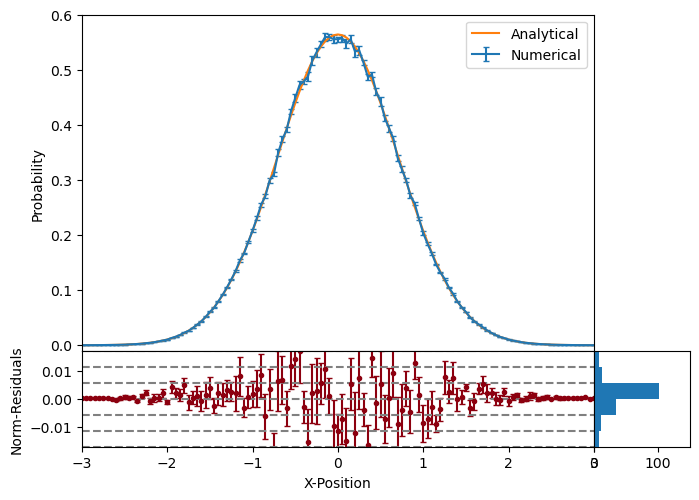

In [94]:
#moi = generateNRandomPaths(1,0)[0]
#time = np.arange(0,T,dt)/dt
#plt.plot(moi,time)

f1 = plt.figure(1)
f1.add_axes((0,0,0.8,0.7))
plt.gca().set_ylim([-0.01,0.6])
plt.gca().set_xlim([-3,3])
plt.gca().axes.get_xaxis().set_ticks([])

plt.ylabel("Probability")
#plt.plot(xs,Psi(paths))


plt.errorbar(xs, ys, yerrs, capsize=2, label = "Numerical")
plt.plot(xs,wavefunc(xs), label = "Analytical")
plt.legend()


##########################################

j = 3

stdd = np.std(normres)

f1.add_axes((0,-0.2,0.8,0.2))
plt.gca().set_ylim([-j*stdd,j*stdd])
plt.gca().set_xlim([-3,3])


plt.ylabel("Norm-Residuals")
plt.xlabel("X-Position")
stdresarray = np.ones(len(normres))*stdd
plt.errorbar( xs, normres, reserrs, fmt=".", color = "#8C000F", capsize=2)



for i in range(-j,j+1):
    plt.plot(xs,i*stdresarray, color='grey', linestyle='dashed')

#######################################

f1.add_axes((0.8,-0.2,0.15,0.2))
plt.gca().set_ylim([-j*stdd,j*stdd])
plt.gca().set_xlim([0,150])
plt.gca().axes.get_yaxis().set_ticks([])

plt.hist(normres, np.arange(-j*stdd,(j+1)*stdd,stdd), density=1, orientation = "horizontal")

# np.arange(-j*stdd,(j+1)*stdd,0.5*stdd)


#actionarray = metropolis(100,0)
#plt.plot(np.arange(0,100,1),actionarray)
plt.show()